Video Games data set. 
--


In [1]:
import pandas as pd
from matplotlib import pyplot as plt
from scipy import stats as st
import seaborn as sns
import numpy as np
import plotly.express as px

In [2]:
games=pd.read_csv('datasets/games.csv')
print('The DataFrame has the next columns:\n')
games.info()
#print(games.head())


The DataFrame has the next columns:

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16715 entries, 0 to 16714
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Name             16713 non-null  object 
 1   Platform         16715 non-null  object 
 2   Year_of_Release  16446 non-null  float64
 3   Genre            16713 non-null  object 
 4   NA_sales         16715 non-null  float64
 5   EU_sales         16715 non-null  float64
 6   JP_sales         16715 non-null  float64
 7   Other_sales      16715 non-null  float64
 8   Critic_Score     8137 non-null   float64
 9   User_Score       10014 non-null  object 
 10  Rating           9949 non-null   object 
dtypes: float64(6), object(5)
memory usage: 1.4+ MB


Clean and clear the Data Frame. 
--
Analize duplicated values, missing values, columns names, type of value of each column.
Columns names are with capital letters, lets change them to lower letters to have a better data management. 

In [3]:
new_columns= []
for c in games.columns:
    low_c=c.lower()
    new_columns.append(low_c)
games.columns = new_columns
print(games.columns)
#games.info()

Index(['name', 'platform', 'year_of_release', 'genre', 'na_sales', 'eu_sales',
       'jp_sales', 'other_sales', 'critic_score', 'user_score', 'rating'],
      dtype='object')


In [4]:
print('The DF has ',games.duplicated().sum(), 'duplicated rows.')
print('The DF has the following amount of null in each column:\n',games.isna().sum())

The DF has  0 duplicated rows.
The DF has the following amount of null in each column:
 name                  2
platform              0
year_of_release     269
genre                 2
na_sales              0
eu_sales              0
jp_sales              0
other_sales           0
critic_score       8578
user_score         6701
rating             6766
dtype: int64


Analyze each column with NaN values to determine if it is possible to remove the rows or replace the value with a different one that fits the values.
Let's start with the name and gender columns, because it looks like their NaN values belong to the same rows.

In [5]:
print("The two rows with NaN value in the column name are:\n",games[games['name'].isna()])
print("The two rows with NaN value in the column genre are:\n",games[games['genre'].isna()])
games.fillna({'name':'NA'},inplace=True)
games.fillna({'genre':'NA'},inplace=True)
print('Now the NaN values in name is:',games['name'].isna().sum())
print('Now the NaN values in genre is:',games['genre'].isna().sum())
#games.info()

The two rows with NaN value in the column name are:
       name platform  year_of_release genre  na_sales  eu_sales  jp_sales  \
659    NaN      GEN           1993.0   NaN      1.78      0.53      0.00   
14244  NaN      GEN           1993.0   NaN      0.00      0.00      0.03   

       other_sales  critic_score user_score rating  
659           0.08           NaN        NaN    NaN  
14244         0.00           NaN        NaN    NaN  
The two rows with NaN value in the column genre are:
       name platform  year_of_release genre  na_sales  eu_sales  jp_sales  \
659    NaN      GEN           1993.0   NaN      1.78      0.53      0.00   
14244  NaN      GEN           1993.0   NaN      0.00      0.00      0.03   

       other_sales  critic_score user_score rating  
659           0.08           NaN        NaN    NaN  
14244         0.00           NaN        NaN    NaN  
Now the NaN values in name is: 0
Now the NaN values in genre is: 0


Clearing the release year column of its 250 NaN values. 
Calculate the mean and median to determine the value that will replace the NaN values.

In [6]:
print('Mean -> ',games['year_of_release'].mean())
print('Median->',games['year_of_release'].median())
games.fillna({'year_of_release':2006.0},inplace=True)
print('Now the NaN values in year_of_release is: ',games['year_of_release'].isna().sum())
print('After the change the Mean is-> ',games['year_of_release'].mean())
print('After the change the Median is ->',games['year_of_release'].median())
games['year_of_release']=games['year_of_release'].astype('int')
#games.info()

Mean ->  2006.4846163200777
Median-> 2007.0
Now the NaN values in year_of_release is:  0
After the change the Mean is->  2006.4768172300328
After the change the Median is -> 2007.0


Now let's clean critic_score and user_score columns.
Both columns have more than 6000 NaN values, let's calculate the mean and the median.
Both columns need to have float type of values. 

In [7]:
#critic_score column
print('Mean of critic_score ->',games['critic_score'].mean())
print('Median of critic_score ->',games['critic_score'].median())
games.fillna({'critic_score':71},inplace=True)
print('After the replacement the Mean of critic_score is->',games['critic_score'].mean())
print('After the replacement the Median of critic_score is->',games['critic_score'].median())

#user_score column
#values=games.query("user_score != 'tbd'")
#tbd_values=games.query("user_score == 'tbd'").count()
#nan_values = games['user_score'].isna().sum()
#print('There are nan ->',nan_values)
#print('There are tbd ->',tbd_values['user_score'])
#print(games['user_score'].count())
#values=values['user_score'].astype('float')
#games.replace({'user_score':'tbd'},'7.5',inplace=True)
#print('Mean of user_score ->',values.mean())
#print('Median of user_score ->',values.median())
#games['user_score']=games['user_score'].astype('float')
#games.fillna({'user_score':7.5},inplace=True)
#print('After the replacement the Mean of user_score ->',games['user_score'].mean())
#print('After the replacement the Median of user_score ->',games['user_score'].median())

games['user_score']=pd.to_numeric(games['user_score'],errors='coerce')
print('Mean of user_score ->',games['user_score'].mean())
print('Median of user_score ->',games['user_score'].median())
games.fillna({'user_score':7.5},inplace=True)
print('After the replacement the Mean of user_score ->',games['user_score'].mean())
print('After the replacement the Median of user_score ->',games['user_score'].median())


Mean of critic_score -> 68.96767850559173
Median of critic_score -> 71.0
After the replacement the Mean of critic_score is-> 70.01064911755908
After the replacement the Median of critic_score is-> 71.0
Mean of user_score -> 7.125046113306982
Median of user_score -> 7.5
After the replacement the Mean of user_score -> 7.329739754711337
After the replacement the Median of user_score -> 7.5


In [8]:
games.fillna({'rating':'NA'},inplace=True)
games.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16715 entries, 0 to 16714
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   name             16715 non-null  object 
 1   platform         16715 non-null  object 
 2   year_of_release  16715 non-null  int32  
 3   genre            16715 non-null  object 
 4   na_sales         16715 non-null  float64
 5   eu_sales         16715 non-null  float64
 6   jp_sales         16715 non-null  float64
 7   other_sales      16715 non-null  float64
 8   critic_score     16715 non-null  float64
 9   user_score       16715 non-null  float64
 10  rating           16715 non-null  object 
dtypes: float64(6), int32(1), object(4)
memory usage: 1.3+ MB


In [9]:
#Totals of sales. 
games['total_sales']=games['na_sales']+games['eu_sales']+games['jp_sales']+games['other_sales']
games.head()

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,total_sales
0,Wii Sports,Wii,2006,Sports,41.36,28.96,3.77,8.45,76.0,8.0,E,82.54
1,Super Mario Bros.,NES,1985,Platform,29.08,3.58,6.81,0.77,71.0,7.5,NA,40.24
2,Mario Kart Wii,Wii,2008,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E,35.52
3,Wii Sports Resort,Wii,2009,Sports,15.61,10.93,3.28,2.95,80.0,8.0,E,32.77
4,Pokemon Red/Pokemon Blue,GB,1996,Role-Playing,11.27,8.89,10.22,1.00,71.0,7.5,NA,31.38


SUMMARY OF DATA PREPARATION.

Now the data frame hasn't duplicated values or absent values. 
The names of the columns have an easy format. 


DATA ANALYSIS 
--


Let's start for analyze the data from the perspecctive of the year of release of each game. 


Total of games released by years by each platforms:



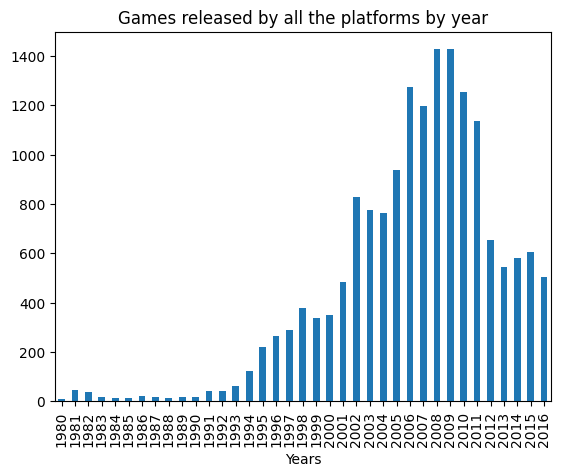

In [149]:
#print(games.groupby('year_of_release').count()['platform'])
print('Total of games released by years by each platforms:\n')
games.groupby('year_of_release')['platform'].count().plot(kind='bar',y='platform',x='year_of_release',xlabel='Years', title='Games released by all the platforms by year')
plt.show()


According to the above graphs, we can see that the total sales each year increase simultaneously as the platforms increase their game releases.

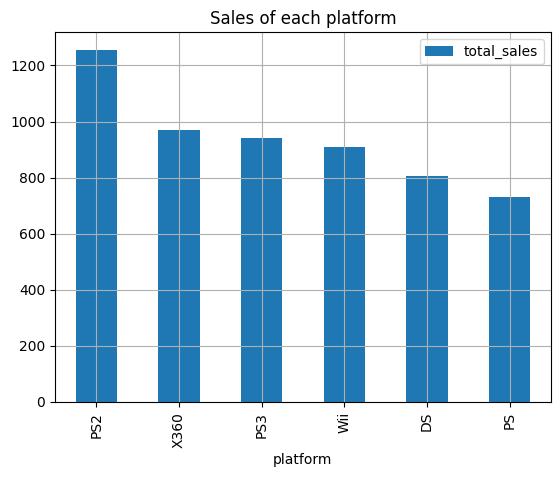

In [160]:
sales_platforms= games.groupby('platform')['total_sales'].sum().sort_values(ascending=False).reset_index()
top=sales_platforms[sales_platforms['total_sales']>700]
#print(top)
top.plot(kind='bar',x='platform',y='total_sales',title='Sales of each platform',grid=True)
plt.show()
games_top = games.query("platform in @top.platform")


PS2 Life time ->  11
X360 Life time ->  11
PS3 Life time ->  10
Wii Life time ->  10
DS Life time ->  28
PS Life time ->  12
Mean Life of the Top 6 compaies ->  13.666666666666666


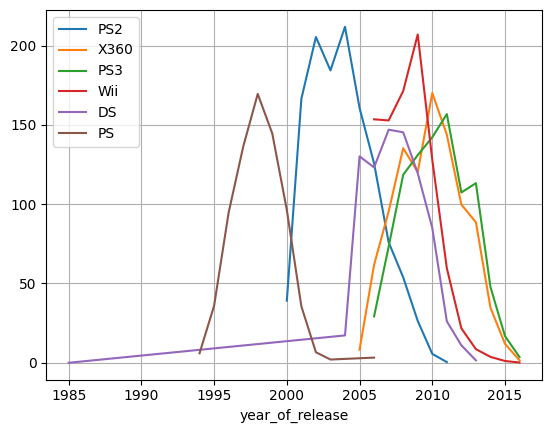

In [255]:
PS2=games_top[games_top['platform']=='PS2'].groupby('year_of_release')['total_sales'].sum()
X360=games_top[games_top['platform']=='X360'].groupby('year_of_release')['total_sales'].sum()
PS3=games_top[games_top['platform']=='PS3'].groupby('year_of_release')['total_sales'].sum()
Wii=games_top[games_top['platform']=='Wii'].groupby('year_of_release')['total_sales'].sum()
DS=games_top[games_top['platform']=='DS'].groupby('year_of_release')['total_sales'].sum()
PS=games_top[games_top['platform']=='PS'].groupby('year_of_release')['total_sales'].sum()

PS2.plot(x='year_of_release',y='total_sales')
X360.plot(x='year_of_release',y='total_sales')
PS3.plot(x='year_of_release',y='total_sales')
Wii.plot(x='year_of_release',y='total_sales')
DS.plot(x='year_of_release',y='total_sales')
PS.plot(x='year_of_release',y='total_sales')
plt.legend(['PS2','X360','PS3','Wii','DS','PS'])
plt.grid(True)


In [280]:
def imprimir (df,start,end,peak):
    print('The life cycle of the platform is in the period of',start ,'-', end)
    print('The maximum year with the maximum sales: \n',peak)
    x,y=peaks_time(peak,start,end)
    print('To get to the peak of sales it took:\n',x)
    print('After the peak of sales, the platform last : \n',y)
    print(df)

def peaks_time (p_peak,p_start,p_end):
    to_h = p_peak['year_of_release']-p_start
    to_l= p_end-p_peak['year_of_release']
    return to_h,to_l
    

The life cycle of the platform is in the period of 2000 - 2011
The maximum year with the maximum sales: 
    year_of_release  total_sales
4             2004       211.81
To get to the peak of sales it took:
 4    4
Name: year_of_release, dtype: int32
After the peak of sales, the platform last : 
 4    7
Name: year_of_release, dtype: int32
year_of_release
2000     39.17
2001    166.43
2002    205.38
2003    184.31
2004    211.81
2005    160.66
2006    125.63
2007     75.99
2008     53.90
2009     26.40
2010      5.64
2011      0.45
Name: total_sales, dtype: float64


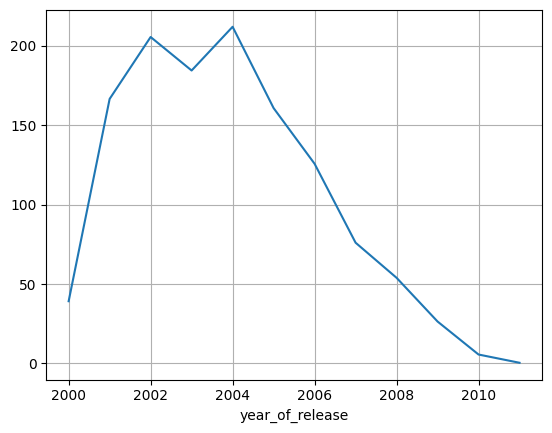

In [281]:
PS2_start = games_top[games_top['platform']=='PS2']['year_of_release'].min()
PS2_end = games_top[games_top['platform']=='PS2']['year_of_release'].max()
PS2_max_sales = PS2.max()
PS2_DF=PS2.reset_index()
PS2_peak=PS2_DF[PS2_DF['total_sales']==PS2_max_sales]
imprimir(PS2,PS2_start,PS2_end,PS2_peak)
PS2.plot(x='year_of_release',y='total_sales')
plt.grid(True)

The PS2 platform had a life cycle of 11 years from when it released its first game until it went off the market.
It reached peak sales in 2004, 4 years after its inception.
However, the platform had rapid growth, from the second year to the seventh year it had high revenue.
From the eighth year onwards, sales began to fall.

The life cycle of the platform is in the period of 2005 - 2016
The maximum year with the maximum sales: 
    year_of_release  total_sales
5             2010       170.03
To get to the peak of sales it took:
 5    5
Name: year_of_release, dtype: int32
After the peak of sales, the platform last : 
 5    6
Name: year_of_release, dtype: int32
year_of_release
2005      8.25
2006     61.80
2007     95.41
2008    135.26
2009    120.29
2010    170.03
2011    143.84
2012     99.74
2013     88.58
2014     34.74
2015     11.96
2016      1.52
Name: total_sales, dtype: float64


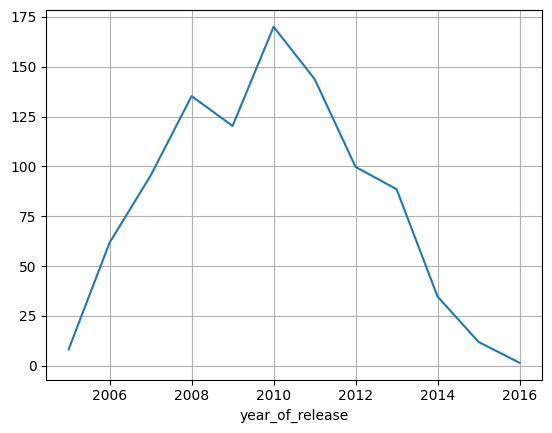

In [283]:
X360_start = games_top[games_top['platform']=='X360']['year_of_release'].min()
X360_end = games_top[games_top['platform']=='X360']['year_of_release'].max()
X360_max_sales = X360.max()
X360_DF=X360.reset_index()
X360_peak=X360_DF[X360_DF['total_sales']==X360_max_sales]
imprimir(X360,X360_start,X360_end,X360_peak)
X360.plot(x='year_of_release',y='total_sales')
plt.grid(True)

The X360 platform had a life cycle of 11 years from when it released its first game until it went off the market.
It reached peak sales in 2010, 5 years after its inception.
However, from the fourth year it had high revenue, this last 4 years. In 2012 the sales began to fall to 2016 that stopped to sale. 

The life cycle of the platform is in the period of 2006 - 2016
The maximum year with the maximum sales: 
    year_of_release  total_sales
5             2011       156.78
To get to the peak of sales it took:
 5    5
Name: year_of_release, dtype: int32
After the peak of sales, the platform last : 
 5    5
Name: year_of_release, dtype: int32
year_of_release
2006     29.27
2007     73.19
2008    118.52
2009    130.93
2010    142.17
2011    156.78
2012    107.36
2013    113.25
2014     47.76
2015     16.82
2016      3.60
Name: total_sales, dtype: float64


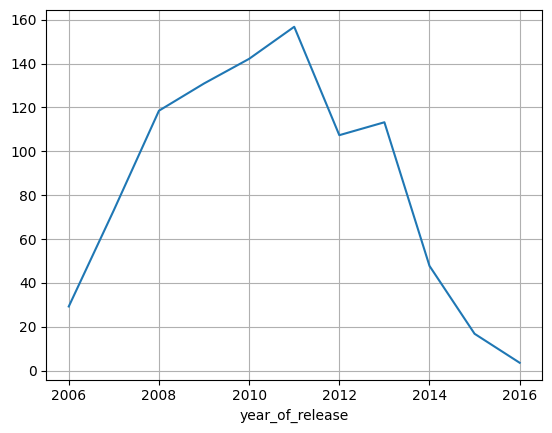

In [284]:
PS3_start = games_top[games_top['platform']=='PS3']['year_of_release'].min()
PS3_end = games_top[games_top['platform']=='PS3']['year_of_release'].max()
PS3_max_sales = PS3.max()
PS3_DF=PS3.reset_index()
PS3_peak=PS3_DF[PS3_DF['total_sales']==PS3_max_sales]
imprimir(PS3,PS3_start,PS3_end,PS3_peak)
PS3.plot(x='year_of_release',y='total_sales')
plt.grid(True)

The PS3 platform had a life cycle of 10 years from when it released its first game until it went off the market.
It reached peak sales in 2011, 5 years after its inception.
However, it evolved quikly, from the third year it had high revenue, this last 6 years. In 2014 the sales began to fall to 2016 that stopped to sale. 

The life cycle of the platform is in the period of 2006 - 2016
The maximum year with the maximum sales: 
    year_of_release  total_sales
3             2009       206.97
To get to the peak of sales it took:
 3    3
Name: year_of_release, dtype: int32
After the peak of sales, the platform last : 
 3    7
Name: year_of_release, dtype: int32
year_of_release
2006    153.48
2007    152.77
2008    171.32
2009    206.97
2010    127.95
2011     59.65
2012     21.71
2013      8.59
2014      3.75
2015      1.14
2016      0.18
Name: total_sales, dtype: float64


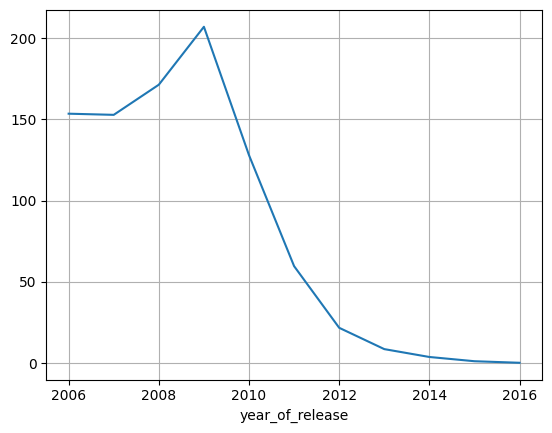

In [285]:
Wii_start = games_top[games_top['platform']=='Wii']['year_of_release'].min()
Wii_end = games_top[games_top['platform']=='Wii']['year_of_release'].max()
Wii_max_sales = Wii.max()
Wii_DF=Wii.reset_index()
Wii_peak=Wii_DF[Wii_DF['total_sales'] == Wii_max_sales]
imprimir(Wii,Wii_start,Wii_end,Wii_peak)
Wii.plot(x='year_of_release',y='total_sales')
plt.grid(True)

The Wii platform had a 10-year life cycle from the release of its first game (2006) until it was discontinued.
It reached peak sales in 2009, 3 years after its inception.
However, it evolved quickly. From the begining it had high revenue that last five years. In 2011, sales began to fall, and in 2016, sales stopped. 

The life cycle of the platform is in the period of 1985 - 2013
The maximum year with the maximum sales: 
    year_of_release  total_sales
4             2007       146.94
To get to the peak of sales it took:
 4    22
Name: year_of_release, dtype: int32
After the peak of sales, the platform last : 
 4    6
Name: year_of_release, dtype: int32
year_of_release
1985      0.02
2004     17.27
2005    130.14
2006    123.15
2007    146.94
2008    145.31
2009    119.54
2010     85.02
2011     26.18
2012     11.01
2013      1.54
Name: total_sales, dtype: float64


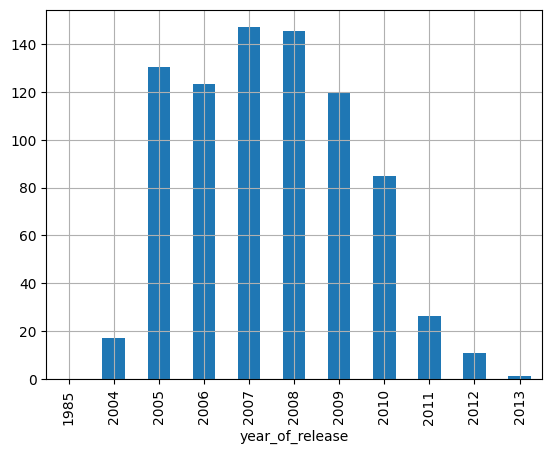

In [289]:
DS_start = games_top[games_top['platform']=='DS']['year_of_release'].min()
DS_end = games_top[games_top['platform']=='DS']['year_of_release'].max()
DS_max_sales = DS.max()
DS_DF=DS.reset_index()
DS_peak=DS_DF[DS_DF['total_sales']==DS_max_sales]
imprimir(DS,DS_start,DS_end,DS_peak)
DS.plot(x='year_of_release',y='total_sales',kind='bar')
plt.grid(True)

The DS platform had a 28-year life cycle from the release of its first game (1994) until it was discontinued.
This platform is the oldest, with good sales lasting more than 20 years. 
However, it took 22 years to reach the highest point of sales.  
The platform released a game in 1985 for the first time, and after that, it waited until 2004 to release more games. 
After that year, sales growth continued until 2007, when sales were at their highest. However, after that year, sales remained good for two more years before starting to fall, and in 2013, sales stopped. 

The life cycle of the platform is in the period of 1994 - 2006
The maximum year with the maximum sales: 
    year_of_release  total_sales
4             1998       169.49
To get to the peak of sales it took:
 4    4
Name: year_of_release, dtype: int32
After the peak of sales, the platform last : 
 4    8
Name: year_of_release, dtype: int32
year_of_release
1994      6.03
1995     35.96
1996     94.70
1997    136.17
1998    169.49
1999    144.53
2000     96.37
2001     35.59
2002      6.67
2003      2.07
2006      3.28
Name: total_sales, dtype: float64


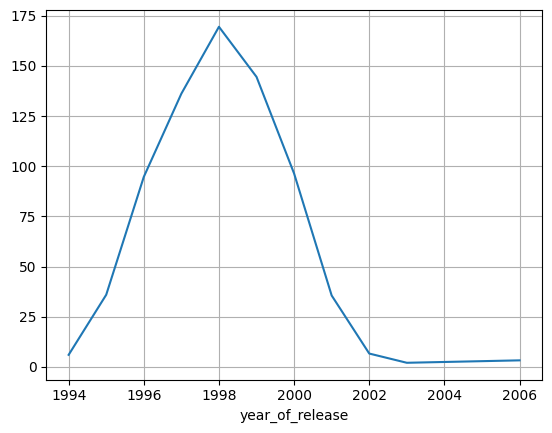

In [288]:
PS_start = games_top[games_top['platform']=='PS']['year_of_release'].min()
PS_end = games_top[games_top['platform']=='PS']['year_of_release'].max()
PS_max_sales = PS.max()
PS_DF=PS.reset_index()
PS_peak=PS_DF[PS_DF['total_sales']==PS_max_sales]
imprimir(PS,PS_start,PS_end,PS_peak)
PS.plot(x='year_of_release',y='total_sales')
plt.grid(True)

The PS platform had a 12-year life cycle from the release of its first game (1994) until it was discontinued.
This platform is one of the oldest, with good sales.
And, it just took 4 years to reach the highest point of sales.  
The platform released a game in 1994 for the first time.
After that year, sales growth three years later reaching the peak in 1998. However, after that year, sales remained good for two more years before starting to fall, and in 2006, sales stopped. 

In [301]:
PS2_life_time= PS2_end - PS2_start 
print('PS2 Life time -> ',PS2_life_time)
X360_life_time= X360_end - X360_start 
print('X360 Life time -> ',X360_life_time)
PS3_life_time= PS3_end - PS3_start 
print('PS3 Life time -> ',PS3_life_time)
Wii_life_time= Wii_end - Wii_start 
print('Wii Life time -> ',Wii_life_time)
DS_life_time= DS_end - DS_start 
print('DS Life time -> ',DS_life_time)
PS_life_time= PS_end - PS_start 
print('PS Life time -> ',PS_life_time)
mean_lifetime= (PS2_life_time+X360_life_time+PS3_life_time+Wii_life_time+DS_life_time+PS_life_time)/6
print('Mean Life of the Top 6 compaies -> ', mean_lifetime)

ps2_to_h, ps2_to_l = peaks_time (PS2_peak,PS2_start,PS2_end)
x360_to_h, x360_to_l = peaks_time (X360_peak,X360_start,X360_end)
ps3_to_h, ps3_to_l = peaks_time (PS3_peak,PS3_start,PS3_end)
wii_to_h, wii_to_l = peaks_time (Wii_peak,Wii_start,Wii_end)
ds_to_h, ds_to_l = peaks_time (DS_peak,PS_start,DS_end)
ps_to_h, ps_to_l = peaks_time (PS_peak,PS_start,PS_end)

total_to_h=(ps2_to_h+x360_to_h+ps3_to_h+wii_to_h+ds_to_h+ps_to_h)/6
print(ps2_to_h+x360_to_h+ps3_to_h+wii_to_h+ds_to_h+ps_to_h)


PS2 Life time ->  11
X360 Life time ->  11
PS3 Life time ->  10
Wii Life time ->  10
DS Life time ->  28
PS Life time ->  12
Mean Life of the Top 6 compaies ->  13.666666666666666
3   NaN
4   NaN
5   NaN
Name: year_of_release, dtype: float64


According to the graphs above, the platform with more sales is PS2.

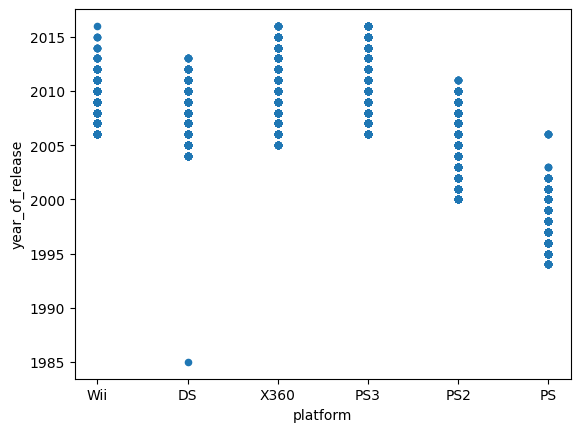

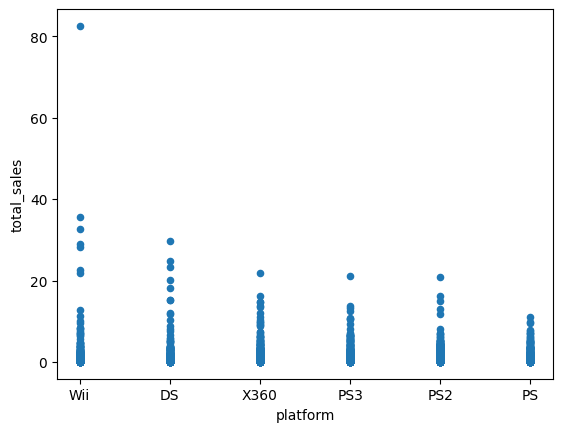

In [157]:
games_top.plot(kind='scatter',x='platform',y='year_of_release',)
games_top.plot(kind='scatter',x='platform',y='total_sales')
#games_top.plot(kind='scatter',x='year_of_release',y='total_sales')
plt.show()